<h1>Working With Excel Files</h1>
<br>
This notebook illustrates some of the possiblities to export Python to Excel using the <b>openpyxl</b> package.

Importing the necessary libraries for the rest of the notebook:

In [1]:
# Import the numerical library for python numerical operations
import numpy as np
# The os (operative system) library allow's us to do several read/write and configuration operations in our computer
import os
# Pandas is a powerful data analysis library that allows us to manipulate tabular data
import pandas as pd
# Datetime is python's library used to define and manipulate time objects
import datetime
# We import the module pyplot from matplotlib and call it plt
import matplotlib.pyplot as plt
# Seaborn is a visualization library based on matplotlib specially designed for statistical data
import seaborn as sns
# we initialize seaborn to give its aesthetics to the graphs used in this notebook  
sns.set()
# all the lines of code starting with a "%" allow us to change the configuration of the notebook
# the following line forces the notebook to display the results of each matplotlib plot below the cell where they were
# constructed
%matplotlib inline

From the <b>openpyxl</b> module, the following submodules are downloaded:

In [2]:
# Simple workbook, worksheet operations
from openpyxl import Workbook , load_workbook

In [3]:
# To save impages into file
from openpyxl.drawing.image import Image

In [4]:
# To write pandas data frames into Excel
from openpyxl.utils.dataframe import dataframe_to_rows

In [5]:
# To ad comments to your excel
from openpyxl.comments import Comment

In [6]:
# To add colors and font style
from openpyxl.styles import Font, Color, colors , PatternFill

In [7]:
# To add named styles and alignment
from openpyxl.styles import NamedStyle , Alignment

In [8]:
# For conditional formatting
from openpyxl.formatting.rule import ColorScaleRule, CellIsRule, FormulaRule, Rule
from openpyxl.styles.differential import DifferentialStyle

<h3>Creating sheets & notebooks </h3><br>
In the following code we will create a simple excel work-book and an excel sheet. The workbook does not need to be created in the filesystem. It is just an object in memory

In [9]:
# Create the workbook
work_book = Workbook()
# By default one sheet will be created in the work_book called "sheet" and it will be placed as "active"
# We can get the active worksheet of the workbook like:
work_sheet = work_book.active

In [10]:
# We can give the newly created sheets a particular name:
work_sheet1 = work_book.create_sheet("Seminar")
# We can also position the new sheet at a particular place (for example at the beginning).
# This corresponds to index = 0
work_sheet2 = work_book.create_sheet("Calculations",index=0)

In [11]:
# The Sheets are stored as dictionaries in the computer, it is very easy to acces them:
work_sheet = work_book["Seminar"]
# Once we have a variable corresponding to the sheet we can access all of its properties. For instance,
# we will print the property "title" of the work sheet with name "Seminar":
print(work_sheet.title)

Seminar


<h3>Adding data to the sheet </h3><br>
The lowest element in the hierarchy is a cell:
<br>
Workbook->Worksheet->Cell
<h3>Cells</h3>
Reading and writing a particul cell of a worksheet
<br>

In the same way we accessed a sheet by its name from the workbook, we can access a cell from the work sheet
by using as key the name of the cell (coordinates). The following example shows how to wite a number into cell
A4

In [12]:
# Write 138.0 into cell "A4"
work_sheet['A4'] = 138.0

# Reading data takes place via the attributes of the cell object, in this case, the attribute "value":
cell_value = work_sheet['A4'].value
print(cell_value)

138.0


In [13]:
# We can also call some other properties of the cell such as "font" and its name and size:
print(work_sheet['A4'].font.name)
print(work_sheet['A4'].font.sz)

Calibri
11.0


Another way to access a cell is by using RC-method. That is, by using the method cell of a work sheet:

In [14]:
# Get access to a cell using RC-method
# Setting the cell to a particular value
work_sheet.cell(row=2,column=4,value=123)

# Reading the content of the cell
print(work_sheet.cell(row=2,column=4).value)

123


When a worksheet is created in memory, it contains no cells. A cell object is created when it is first accessed.So when you loop over cells that do not exist, they are actualy going to be created. For example:<br>
<p> for i in range(1,101):<br>
...        for j in range(1,101):<br>
...            ws.cell(row=i, column=j)</p><br>
<br>
will create a 100 x 100 array on the sheet

<h3>Ranges</h3>
Accessing many cells at one can be done by defining a starting point and an ending point on a given work sheet

In [15]:
# columns C to D: this code will iterate on all the rows of columns from C to D
work_sheet['C:D']

# row 5 to 6: this code will iterate on all the rows starting from 5 until 6 for all the columns in the work sheet
work_sheet[5:6]

# range A1 to C2: this range will iterate in both rows and columns between A1 and C2.
cell_range = work_sheet['A1':'C2']

# The result of this three lines will be a list of "Cell" objets that you can use to extract properties
# from a group of Cells.

We can also loop over a given range. We first loop over the columns via the iter_cols method of a worksheet and then  one has to loop over each cell in the column object.

In [16]:
i=0
for column in work_sheet.iter_cols(min_row=4,min_col=2, max_col=3, max_row=6):
    for cell in column:
        cell.value= i
        i+=1

<h2>Saving to a file</h2>
Once we have finishing filling the cells of our working book, we can save it into a file in our computer. If the file exists, it will be overwritten without warning, so be careful when naming your files.

In [17]:
filename = 'test.xlsx'
work_book.save(filename=filename)

If you to the folder of this course, you will find a file called "test.xlsx". How many sheet does it have? are all 
the sheets empty?

If you opened the file in excel, make sure to close it before you continue working with it, otherwise it may cause an error

In [18]:
# Since our workbook has already been saved in our computer we can safely delete the workbook object
del work_book

<h2>Reading the file</h2><br>
Currently, <b>openpyxl</b> does not read all possible items in an Excel file, so images and charts will be lost from existing files if they are opened and saved with the same name.

To demonstrate the excel files reading capabilities, we will start by reading the file we generated earlier and printing the name of the working sheets in it.

In order to read a file we need to use the function `load_workbook`. This function, however, will raise an error if the file doesn't exist in our computer. To avoid this error we can use the `os` library and it's method `os.path.isfile` to read the file if it exist or create a new one otherwise.

In [19]:
# check if file exists
filename = 'test.xlsx'
if os.path.isfile(filename):
    # Reading the sheet names in the book
    print('The file was read correctly')
    work_book_from_file = load_workbook(filename)
else:
    # if the file does not exist, we create a newone
    print('The file does not exist, I will create a new one instead. Please verify that you save your file correctly')
    work_book_from_file = Workbook()

The file was read correctly


Since we just created the file, this function will read it from our computer. We can verify that by printing the names of the sheets in the file we just read:

In [20]:
# We will use the attribute "sheetnames" to print the name of the sheets
print('Sheet Names:',work_book_from_file.sheetnames)

Sheet Names: ['Calculations', 'Sheet', 'Seminar']


We see that the workbook has three sheet names -
The ones that we created earlier

<h3>Number formats</h3>

Now we will work with different ways in which the data can be saved in a cell

In [21]:
# we will work in the active sheet
work_sheet = work_book_from_file.active
# To save an entry in a date format we can use the method datetime.datetime, it receives 3 inputes: year, month, day
work_sheet['A1'] = datetime.datetime(2010, 7, 27)
# we can now declare the format of the cell using the attribute number_format to match the date time specification
# that is: four digits for the year (y), two digits for the month (m) and two digits for the day (d)
work_sheet['A1'].number_format='yyyymmdd'
# we can directly save the result of an operation into a cell as a floating number
work_sheet['A2'] = 13/100
# Declare that the format is a floating number
work_sheet['A2'].number_format = '0.0%'

In [22]:
print("A date time:", work_sheet['A1'].value)
print("A float number:", work_sheet['A2'].value)

A date time: 2010-07-27 00:00:00
A float number: 0.13


<h3>Merge / Unmerge cells</h3>
A powerful feature of excel is that of merging and unmerging cells. We can also do date with the function <b>merge_cells</b>

In [23]:
# Merge the cells from A3 to D3 (all rows and columns)
work_sheet.merge_cells('A3:D3')
# or equivalently
work_sheet.merge_cells(start_row=5,start_column=1,end_row=5,end_column=4)
# we can now set a value for the merged cell
work_sheet.cell(row=5,column=1,value=4)
# Centering the value in the merged row
work_sheet.cell(row=5,column=1).alignment = Alignment(horizontal="center")
work_book_from_file.save('test.xlsx')

<h3>Adding Image into Spreadsheet</h3>
The following code exemplifies how to add images into the Spreadsheets

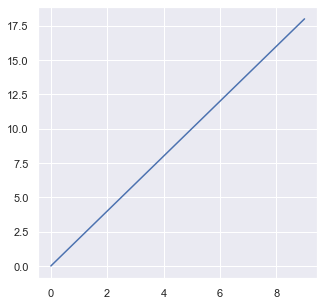

In [24]:
#create figure
fig,ax = plt.subplots(1,1,figsize=(5,5))
# Create an array of numbers from 0 to 10 in steps of 1
x = np.arange(0,10,1)
y = 2*np.arange(0,10,1)
# Generate a plot of the arrays
ax.plot(x ,y)

# save figure as a png file
fig.savefig('myfig.png')

## Embedding into a spread sheet
# We first read the image
img = Image('myfig.png')
# Create a new sheet in our work book
work_sheet_fig = work_book_from_file.create_sheet('Figure')
# Use the method "add_image" with the image we want to add, and the cell where we want to add it
work_sheet_fig.add_image(img, 'A1')
# Save our work book
work_book_from_file.save(filename='test.xlsx')

<h3>Working with Pandas Dataframes</h3>
<br>
 Pandas has a build in function to export to Excel : <b>ExcelWriter</b>. With openpyxl, there are alternative approaches to export data to Excel:

In [25]:
# Create an an array of random numbers of shape (5,10)
x = np.random.randn(5,10)
# Convert the array into a pandas dataframe
df = pd.DataFrame(x)
# Create a new work sheet for this task
work_sheet_pandas = work_book_from_file.create_sheet('Pandas')
# We will iterate on each row of our data framw and add each row to our work sheet
for r in dataframe_to_rows(df, index=True, header=True):
    work_sheet_pandas.append(r)

# These lines gives a pandas "look-and-feel"
for cell in work_sheet_pandas['A'] + work_sheet_pandas[1]:
    # Define the style as "pandas"
    cell.style = 'Pandas'
work_book_from_file.save('test.xlsx')

<h3>Formatting the cells with colors and fonttypes</h3>
Using the library <b>Font</b> we can personalize the cells in our workbook

In [26]:
# create diffenrent fonts, the function Font receives a string with the aRGB hex value that we want for our
# color fonr
red_font = Font(color="00FF0000")
# for italics we define the argument italic to true
font_italic = Font(color="0000F0BB", italic=True)
# define the type of letter in "name" and make it bold by seting "bold" to True
font_bold = Font(name='Arial',color=colors.BLUE,bold=True)

In [27]:
# Apply each of the styles to a given cell in our pandas Data Frame
work_sheet_pandas['A3'].font = red_font
work_sheet_pandas['A4'].font = font_italic
work_sheet_pandas['A5'].font = font_bold
work_book_from_file.save('test.xlsx')

<h2>Named Styles</h2>
We can use the method <b>NamedStyle</b> to define other common excel styles into our spreadsheet

In [28]:
# Highlighting the text: we first need our style a name
highlight = NamedStyle(name="awesome_highlight")
# Adding bold letter, size 20 and Blue color
highlight.font = Font(bold=True, size=20,color=colors.BLUE)
# Add our highlight definition to the work book
work_book_from_file.add_named_style(highlight)

In [29]:
# Apply our style to a cell
work_sheet_pandas['B1'].style = highlight
# We can also use predefined styles such as "calculation"
work_sheet_pandas['C1'].style = 'Calculation'
# Save our results
work_book_from_file.save('test.xlsx')

There are some pre-defined styles that are readily available for us to use. For this we will work on a cell names "Info". The following code will try to read it from the work book or if it does not exist, it will create it

In [30]:
# try to read the sheet
try:
    work_sheet_info = work_book_from_file['Info']
# Create the sheet on failure
except:
    work_sheet_info = work_book_from_file.create_sheet('Info')

In [31]:
## Try out some styles

# Informative styles
work_sheet_info['A1']='Calculation'
work_sheet_info['A1'].style = 'Calculation'
work_sheet_info['A2']='Total'
work_sheet_info['A2'].style='Total'
work_sheet_info['A3']='Note'
work_sheet_info['A3'].style='Note'
work_sheet_info['A4']='Warning Text'
work_sheet_info['A4'].style='Warning Text'
work_sheet_info['A5']='Explanatory Text'
work_sheet_info['A5'].style='Explanatory Text'

# Text styles
work_sheet_info['A6']='Title'
work_sheet_info['A6'].style='Title'
work_sheet_info['A7']='Headline 1'
work_sheet_info['A7'].style='Headline 1'
work_sheet_info['A7']='Headline 2'
work_sheet_info['A8'].style='Headline 3'
work_sheet_info['A8']='Headline 3'
work_sheet_info['A9']='Headline 4'
work_sheet_info['A9'].style='Headline 4'
work_sheet_info['A10']='Hyperlink'
work_sheet_info['A10'].style='Hyperlink'
work_sheet_info['A11']='Followed Hyperlink'
work_sheet_info['A11'].style='Followed Hyperlink'
work_sheet_info['A12']='Linked Cell'
work_sheet_info['A12'].style='Linked Cell'

# Comparisons styles
work_sheet_info['A13']='Input'
work_sheet_info['A13'].style='Input'
work_sheet_info['A14']='Output'
work_sheet_info['A14'].style='Output'
work_sheet_info['A15']='Check Cell'
work_sheet_info['A15'].style='Check Cell'
work_sheet_info['A16']='Good'
work_sheet_info['A16'].style='Good'
work_sheet_info['A17']='Bad'
work_sheet_info['A17'].style='Bad'
work_sheet_info['A18']='Neutral'
work_sheet_info['A18'].style='Neutral'

#Accents styles
work_sheet_info['A19']='20 % - Accent1'
work_sheet_info['A19'].style='20 % - Accent1'
work_sheet_info['A20']='40 % - Accent1'
work_sheet_info['A20'].style='40 % - Accent1'
work_sheet_info['A21']='60 % - Accent1'
work_sheet_info['A21'].style='60 % - Accent1'
work_sheet_info['A22']='Accent2'
work_sheet_info['A22'].style='Accent2'
work_sheet_info['A23']='20 % - Accent2'
work_sheet_info['A23'].style='20 % - Accent2'
work_sheet_info['A24']='40 % - Accent2'
work_sheet_info['A24'].style='40 % - Accent2'
work_sheet_info['A25']='60 % - Accent2'
work_sheet_info['A25'].style='60 % - Accent2'
work_sheet_info['A26']='Accent3'
work_sheet_info['A26'].style='Accent3'
work_sheet_info['A27']='20 % - Accent3'
work_sheet_info['A27'].style='20 % - Accent3'
work_sheet_info['A28']='40 % - Accent3'
work_sheet_info['A28'].style='40 % - Accent3'
work_sheet_info['A29']='60 % - Accent3'
work_sheet_info['A29'].style='60 % - Accent3'
work_sheet_info['A30']='Accent4'
work_sheet_info['A30'].style='Accent4'
work_sheet_info['A31']='20 % - Accent4'
work_sheet_info['A31'].style='20 % - Accent4'
work_sheet_info['A32']='40 % - Accent4'
work_sheet_info['A32'].style='40 % - Accent4'
work_sheet_info['A33']='60 % - Accent4'
work_sheet_info['A33'].style='60 % - Accent4'
work_sheet_info['A34']='Accent5'
work_sheet_info['A34'].style='Accent5'
work_sheet_info['A35']='20 % - Accent5'
work_sheet_info['A35'].style='20 % - Accent5'
work_sheet_info['A36']='40 % - Accent5'
work_sheet_info['A36'].style='40 % - Accent5'
work_sheet_info['A37']='60 % - Accent5'
work_sheet_info['A37'].style='60 % - Accent5'
work_sheet_info['A38']='Accent6'
work_sheet_info['A38'].style='Accent6'
work_sheet_info['A39']='20 % - Accent6'
work_sheet_info['A39'].style='20 % - Accent6'
work_sheet_info['A40']='40 % - Accent6'
work_sheet_info['A40'].style='40 % - Accent6'
work_sheet_info['A41']='60 % - Accent6'
work_sheet_info['A41'].style='60 % - Accent6'
work_sheet_info['A42']='Pandas'
work_sheet_info['A42'].style='Pandas'

In [32]:
# Save the results
work_book_from_file.save('test.xlsx')

<h3>Conditional Formatting </h3>
<br>
In the following code we will only modify a cell if a certain condition is fullfilled. We will create random numbers for the cells A1:A10 and fill the cell when the value is less than 0.5

In [33]:
# Try read from a worksheet named "format" or create it if it does not exist
try:
    work_sheet_format = work_book_from_file['format']
except:
    work_sheet_format = work_book_from_file.create_sheet('format')

# Write a random value on cells A1 to A11
for col in work_sheet_format.iter_cols(min_row=1,min_col=1, max_col=1, max_row=11):
    for cell in col:
        cell.value= np.random.rand(1)[0]
        
# Define a Patern to fill the cells with
redFill = PatternFill(start_color='EE1111',end_color='EE1111',fill_type='solid')

# Using "conditional_formatting.add" we can: 1-select a group of cells to work with, 
# 2-Apply a certain transformation given a "CellIsRule"

# "CellIsRule" will receive an operator, a formula (arguments for the operator), 
# an end condition, and a fill transformation
work_sheet_format.conditional_formatting.add('A2:A10',CellIsRule(operator='lessThan', formula=['0.5'], stopIfTrue=True, fill=redFill))
# save our results
work_book_from_file.save('test.xlsx')